# VaR and CVaR Monte Carlo Simulation -
Andy Li, Luke Andrade, Ryan McKinney, Uday Andotra

This notebook simulates portfolio returns using Monte Carlo methods to estimate Value at Risk (VaR) and Conditional Value at Risk (CVaR). We want to observe VaR and CVaR of a simulated portfolio using historical data. We calculate VaR with and without volatility factor, and can later implement drift to the simulated price paths.

In [1]:
pip install openbb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.2/79.2 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.0/285.0 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.6/275.6 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.0/97.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.0/106.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.9/52.9 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.9/249.9 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.5/309

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from openbb import obb

List of symbols. (Later: Test changes in VaR for diversified vs undiversified portfolios).

In [2]:
sectors = [
    "AAPL",
    "GOOG"
]

Fetch historical price data for the defined sectors from 2022-01-01 using yfinance

In [3]:
data = obb.equity.price.historical(
    sectors,
    start_date="2022-01-01",
    provider="yfinance"
).to_df()

In [4]:
data

,open,high,low,close,volume,split_ratio,dividend,symbol
date,,,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,104487900,0.0,0.0,AAPL
2022-01-03,144.475494,145.550003,143.502502,145.074493,25214000,0.0,0.0,GOOG
2022-01-04,182.630005,182.940002,179.119995,179.699997,99310400,0.0,0.0,AAPL
2022-01-04,145.550507,146.610001,143.816147,144.416504,22928000,0.0,0.0,GOOG
2022-01-05,179.610001,180.169998,174.639999,174.919998,94537600,0.0,0.0,AAPL
...,...,...,...,...,...,...,...,...
2024-12-03,173.119995,174.320007,172.509995,173.020004,15721500,0.0,0.0,GOOG
2024-12-04,242.869995,244.110001,241.250000,243.009995,44383900,0.0,0.0,AAPL
2024-12-04,172.779999,176.429993,172.750000,176.089996,18239800,0.0,0.0,GOOG


Calculate daily returns for each sector

In [5]:
data["returns"] = data.groupby("symbol").close.pct_change()

In [6]:
returns = data.groupby('date')['returns'].sum().reset_index()
returns

,date,returns
0,2022-01-03,0.000000
1,2022-01-04,-0.017227
2,2022-01-05,-0.073430
3,2022-01-06,-0.017438
4,2022-01-07,-0.002985
...,...,...
731,2024-11-29,0.008284
732,2024-12-02,0.024127
733,2024-12-03,0.013003
734,2024-12-04,0.019227


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
path = '/content/drive/My Drive/Foundations FSRM Project/Historical Returns.csv'

returns.to_csv(path, index=False)

Mean daily returns and equal weights for each sector

In [7]:
portfolio_stats = data.groupby("symbol").agg(
    daily_returns=("returns", "mean"),
)

In [8]:
portfolio_stats["weights"] = 1 / len(sectors)

In [9]:
portfolio_stats.head()

,daily_returns,weights
symbol,,
AAPL,0.000541,0.5
GOOG,0.000461,0.5


Covariance matrix of the sector returns

In [10]:
covariance_matrix = (
    data
    .pivot(
        columns="symbol",
        values="returns"
    )
    .dropna()
    .cov()
)
covariance_matrix

symbol,AAPL,GOOG
symbol,,
AAPL,0.000295,0.000221
GOOG,0.000221,0.000422


Simulation parameters: number of simulations, days, initial capital

In [11]:
simulations = 1000
days = len(data.index.unique())
initial_capital = 100_000

In [12]:
portfolio = np.zeros((days, simulations))

In [13]:
data

,open,high,low,close,volume,split_ratio,dividend,symbol,returns
date,,,,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,104487900,0.0,0.0,AAPL,NaN
2022-01-03,144.475494,145.550003,143.502502,145.074493,25214000,0.0,0.0,GOOG,NaN
2022-01-04,182.630005,182.940002,179.119995,179.699997,99310400,0.0,0.0,AAPL,-0.012692
2022-01-04,145.550507,146.610001,143.816147,144.416504,22928000,0.0,0.0,GOOG,-0.004536
2022-01-05,179.610001,180.169998,174.639999,174.919998,94537600,0.0,0.0,AAPL,-0.026600
...,...,...,...,...,...,...,...,...,...
2024-12-03,173.119995,174.320007,172.509995,173.020004,15721500,0.0,0.0,GOOG,0.000231
2024-12-04,242.869995,244.110001,241.250000,243.009995,44383900,0.0,0.0,AAPL,0.001484
2024-12-04,172.779999,176.429993,172.750000,176.089996,18239800,0.0,0.0,GOOG,0.017744


Create array filled with historical daily returns for each sector

In [15]:
historical_returns = np.full(
    shape=(days, len(sectors)),
    fill_value=portfolio_stats.daily_returns
)

In [16]:
historical_returns

array([[0.00054062, 0.00046102],
       [0.00054062, 0.00046102],
       [0.00054062, 0.00046102],
       ...,
       [0.00054062, 0.00046102],
       [0.00054062, 0.00046102],
       [0.00054062, 0.00046102]])

In [17]:
returns

,date,returns
0,2022-01-03,0.000000
1,2022-01-04,-0.017227
2,2022-01-05,-0.073430
3,2022-01-06,-0.017438
4,2022-01-07,-0.002985
...,...,...
731,2024-11-29,0.008284
732,2024-12-02,0.024127
733,2024-12-03,0.013003
734,2024-12-04,0.019227


In [18]:
historical_volatility = returns['returns'].std() * (252**0.5)  # 252 trading days in a year


In [19]:
historical_volatility

0.5404460162980532

Cholesky decomposition on covariance matrix to generate correlated random variables

In [20]:
L = np.linalg.cholesky(covariance_matrix)

Run simulations to generate daily returns and simulate portfolio paths
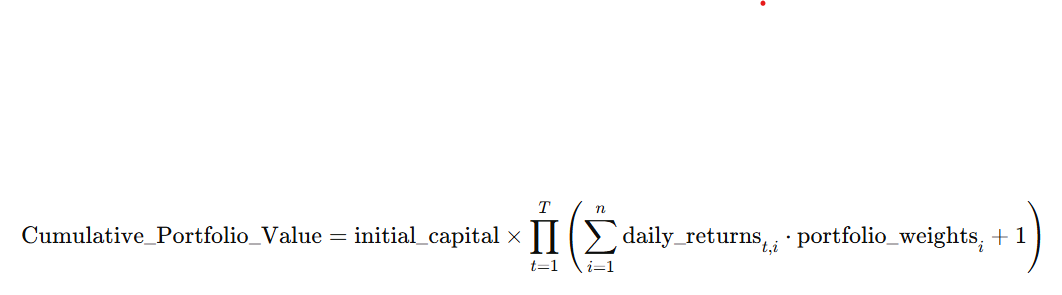

In [21]:
for i in range(0, simulations):
    Z = np.random.normal(size=(days, len(sectors)))
    daily_returns = historical_returns + np.dot(L, Z.T).T
    portfolio[:, i] = (
        np.cumprod(np.dot(daily_returns, portfolio_stats.weights) + 1) * initial_capital
    )

In [22]:
Z

array([[-1.51144088, -0.82589876],
       [-0.63839777, -0.11919211],
       [ 1.06001379, -0.71958689],
       ...,
       [ 0.40227197,  0.04727398],
       [ 0.69793534, -0.30603707],
       [ 0.20082479, -0.33807666]])

In [23]:
simulated_portfolio = pd.DataFrame(portfolio)

In [24]:
simulated_portfolio

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,101488.879539,100817.148401,99055.099485,99813.073581,100593.013903,101711.477085,101073.337437,98976.099982,100542.643025,96414.917168,...,98964.674010,98321.442664,99661.297805,103370.804741,99161.826682,100320.158881,99823.588653,102576.812734,100094.232682,97116.360678
1,100406.295959,102837.621940,99264.135268,100284.449526,99143.031482,104577.953079,102374.619267,98963.348118,98442.522977,95012.239374,...,98922.568862,96095.288856,100919.819902,103171.230822,100089.505255,101505.479286,100491.516555,103612.216455,99429.698253,96140.155560
2,100727.526134,103388.012742,99502.622095,102964.028627,97913.090400,105590.811824,98215.334546,95534.960343,98155.274731,96576.101179,...,100673.535491,95986.801548,102622.857723,107851.896407,98634.661760,101229.255240,99804.959090,103954.059365,98294.209052,97166.658507
3,98997.285125,103057.408602,99669.266280,101673.731586,97230.455119,104116.100526,95471.279005,95161.913675,98723.491710,96776.388828,...,100777.651917,94821.415540,103795.184160,108858.126779,96147.624654,101432.371499,100098.725502,100151.952083,96381.040042,95946.081479
4,98851.941519,104490.975118,101635.971267,98277.559762,97530.045179,102410.719701,93768.009187,97566.896540,101402.842884,93656.929835,...,99698.711387,97359.589338,103873.932383,112076.853395,98537.271453,99169.285870,100919.466631,98556.700460,94968.889803,94661.022202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,82477.945082,75883.936910,86467.238101,95464.727975,99891.965049,155532.297972,331042.477506,102348.872888,86912.162937,72760.247258,...,255196.356850,47526.841473,83254.183572,70306.001745,124629.432005,176618.137918,365357.641695,113824.570306,174140.312602,38791.108116
732,81731.189289,75155.648097,84500.339506,91161.180548,97746.823655,155967.852514,330741.277278,97320.426397,84981.100451,72422.299755,...,258101.181758,47812.901011,83319.513699,71723.777938,124343.688567,180503.727455,357145.264350,111137.594026,170023.454409,38733.152851
733,83501.797167,74607.221274,84694.052823,91848.576468,99714.604179,158439.832136,334235.998551,97509.572870,85402.494290,72595.202639,...,255502.542927,47673.460694,82919.113188,73384.704239,124690.473088,185257.755074,348176.611038,113015.293239,170833.304167,39001.479001
734,84150.670511,75168.125822,83771.071290,92948.281338,100774.585871,155904.971566,339744.883722,95829.339911,85565.532182,73401.808388,...,256570.253388,48466.567860,84525.364912,73330.958556,123933.377371,186179.814759,340570.614918,111228.603962,173558.127379,39334.716053


Set alpha level for VaR and CVaR calculations

In [25]:
alpha = 5

Define function to calculate Monte Carlo VaR

In [26]:
def montecarlo_var(alpha):
    """Calculate Monte Carlo Value at Risk (VaR).

    Parameters
    ----------
    alpha : float
        The confidence level for the VaR calculation.

    Returns
    -------
    float
        The VaR value at the given confidence level.
    """

    # Calculate the percentile of the simulated portfolio values at alpha level
    sim_val = simulated_portfolio.iloc[-1, :]
    return np.percentile(sim_val, alpha)

Historical Volatility calculation

In [27]:
# Calculate historical volatility (annualized)
historical_volatility = historical_returns.std() * (np.sqrt(252))  # Adjust for annualized volatility


In [28]:
portfolio_vol = np.zeros((days, simulations))


In [29]:
# Simulate price paths using historical volatility
for i in range(0, simulations):
    Z = np.random.normal(0, historical_volatility, size=(days, len(sectors)))
    daily_returns = historical_returns + np.dot(L, Z.T).T
    portfolio_vol[:, i] = (
      np.cumprod(np.dot(daily_returns, portfolio_stats.weights) + 1) * initial_capital
    )

In [30]:
simulated_portfolio_vol = pd.DataFrame(portfolio_vol)

In [31]:
simulated_portfolio_vol

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,100052.664095,100050.370767,100049.609523,100049.933798,100049.785459,100051.077435,100050.080609,100050.576937,100051.354681,100049.522319,...,100051.356907,100047.844418,100051.106818,100048.911331,100051.033932,100049.063216,100051.175576,100049.775228,100051.602326,100051.242548
1,100102.271033,100100.863911,100098.239755,100100.838006,100100.584596,100099.313978,100099.528577,100100.234004,100099.184547,100099.191391,...,100101.593587,100098.719413,100100.802855,100098.906025,100100.341015,100099.495425,100101.526503,100100.675208,100101.900225,100100.314788
2,100153.308365,100149.063415,100147.736634,100150.843029,100150.886386,100150.189204,100150.117427,100148.785716,100148.798866,100149.845950,...,100153.128277,100150.522627,100151.126104,100148.179644,100150.425687,100151.015389,100150.542173,100151.347000,100150.791072,100150.257120
3,100203.118998,100197.253123,100196.078768,100201.969170,100201.074882,100200.376030,100199.310090,100197.101331,100198.694295,100201.618424,...,100203.364221,100200.864666,100201.031235,100199.014087,100199.530193,100201.371618,100199.872917,100202.817966,100199.700366,100201.139862
4,100252.267151,100246.872614,100246.490495,100252.217698,100251.186180,100250.634192,100251.462422,100247.962857,100248.910484,100250.507604,...,100255.752373,100249.699543,100251.127047,100249.380939,100248.779765,100251.212023,100249.687877,100252.097233,100250.437647,100251.587779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,144199.784395,144272.290861,144290.979757,144210.214418,144257.496502,144205.745990,144216.760322,144270.589229,144304.935654,144169.951366,...,144307.275082,144196.280903,144254.419554,144250.081397,144247.304950,144225.754362,144222.733671,144275.767148,144270.897033,144261.673323
732,144272.520140,144346.670484,144364.666601,144281.080391,144331.757627,144278.611694,144289.857398,144342.940129,144379.101257,144241.272328,...,144377.597912,144266.232913,144326.641773,144322.425152,144320.166335,144297.694573,144293.402653,144350.924563,144342.833363,144333.322614
733,144342.647332,144418.574697,144437.986433,144352.035759,144404.007954,144350.713187,144363.082472,144415.958280,144450.245502,144317.981624,...,144450.839025,144338.651569,144399.768547,144393.355297,144394.241027,144374.026255,144365.847250,144425.972714,144413.334437,144406.915571
734,144414.546262,144487.066238,144509.465041,144424.508820,144478.755022,144422.320468,144434.955138,144486.844858,144522.116240,144389.236071,...,144522.518967,144412.218115,144474.607497,144462.821531,144469.059502,144447.753003,144434.557929,144500.007917,144485.520227,144477.535727


Define function to calculate VaR considering volatility

In [32]:
def montecarlo_var(alpha):
    """Calculate Monte Carlo Value at Risk (VaR) considering historical volatility.

    Parameters:
        alpha : float
          The confidence level for the VaR calculation.

    Returns:
        float
          The VaR value at the given confidence level.
    """


    # Calculate the returns for the final simulated day
    sim_val = simulated_portfolio.iloc[-1, :]
    next_day = simulated_portfolio.iloc[0, :]
    VaR = np.percentile(sim_val, alpha)
    VaR_day = np.percentile(next_day, alpha)
    return VaR, VaR_day


Define function to calculate Conditional VaR

In [33]:
def conditional_var(alpha):
    """Calculate Conditional Value at Risk (CVaR).

    Parameters
    ----------
    alpha : float
        The confidence level for the CVaR calculation.

    Returns
    -------
    float
        The CVaR value at the given confidence level.
    """

    # Calculate the mean of the simulated portfolio values below the VaR threshold
    sim_val = simulated_portfolio.iloc[-1, :]
    next_day = simulated_portfolio.iloc[0, :]
    return sim_val[sim_val <= montecarlo_var(alpha)[0]].mean(), next_day[next_day <= montecarlo_var(alpha)[1]].mean()

Calculate Monte Carlo VaR and Conditional VaR

In [34]:
mc_var, mc_day_var = montecarlo_var(alpha)
#mc_vol_var = montecarlo_vol_var(alpha)
cond_var, cond_day_var = conditional_var(alpha)
#cond_vol_var = conditional_vol_var(alpha)

In [35]:
mc_var

59283.6660353705

In [36]:
mc_day_var

97426.16303026763

Plot the simulated portfolio paths and highlight VaR and CVaR

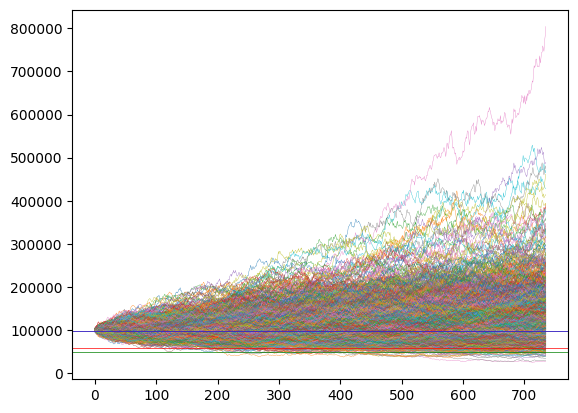

In [37]:
ax = simulated_portfolio.plot(lw=0.25, legend=False)
ax.axhline(mc_var, lw=0.5, c="r")
ax.axhline(mc_day_var, lw=0.5, c="orange")
ax.axhline(cond_var, lw=0.5, c="g")
ax.axhline(cond_day_var, lw=0.5, c="b")

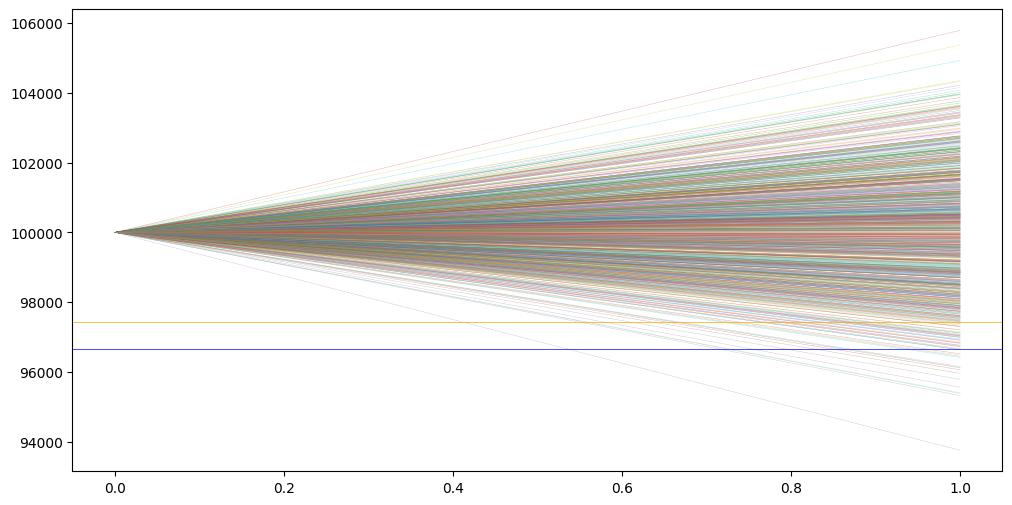

In [38]:
fig, ax = plt.subplots(figsize=(12, 6))
for col in simulated_portfolio.columns[:1000]:
    # Prepend 100,000 to the first row of each simulation
    ax.plot([100000] + simulated_portfolio.iloc[:1, col].tolist(), alpha=0.5, linewidth=0.25)
ax.axhline(mc_day_var, lw=0.5, c="orange")
ax.axhline(cond_day_var, lw=0.5, c="b")


Kupiec POF test

In [39]:
from scipy.stats import chi2

def kupiec_pof_test(failures, total_obs, alpha):
    """
    Kupiec Proportion of Failures (POF) Test.

    Parameters:
    failures (int): The number of observed failures (VaR breaches).
    total_obs (int): The total number of observations.
    alpha (float): The confidence level (e.g., 0.95 for 95% confidence).

    Returns:
    tuple: Test statistic, p-value, and whether the model is accepted.
    """
    p = alpha
    # Compute test statistic
    likelihood_obs = (failures / total_obs) ** failures * ((1 - (failures / total_obs)) ** (total_obs - failures))
    likelihood_exp = (p ** failures) * ((1 - p) ** (total_obs - failures))
    test_stat = -2 * np.log(likelihood_exp / likelihood_obs)

    # Compute p-value from chi square
    p_value = 1 - chi2.cdf(test_stat, df=1)

    reject_model = p_value < 0.05

    return test_stat, p_value, reject_model

In [40]:
threshold = 1 - initial_capital/mc_day_var
failures = len(returns[returns['returns'] < threshold]['returns'])

test_stat, p_value, reject = kupiec_pof_test(failures, len(returns['returns']), 0.05)
print("Test Statistic: ", test_stat, "\nP Value: ", p_value, "\nReject: ", reject)

Test Statistic:  174.8674430803879 
P Value:  0.0 
Reject:  True


In [41]:
len(returns['returns'])

736

In [42]:
returns

,date,returns
0,2022-01-03,0.000000
1,2022-01-04,-0.017227
2,2022-01-05,-0.073430
3,2022-01-06,-0.017438
4,2022-01-07,-0.002985
...,...,...
731,2024-11-29,0.008284
732,2024-12-02,0.024127
733,2024-12-03,0.013003
734,2024-12-04,0.019227


In [43]:
returns

,date,returns
0,2022-01-03,0.000000
1,2022-01-04,-0.017227
2,2022-01-05,-0.073430
3,2022-01-06,-0.017438
4,2022-01-07,-0.002985
...,...,...
731,2024-11-29,0.008284
732,2024-12-02,0.024127
733,2024-12-03,0.013003
734,2024-12-04,0.019227


In [44]:
threshold

-0.026418334558990564